# TMDB Movies & TV Dataset: Comprehensive EDA
### *Kaggle Grandmaster Edition*

This notebook provides a systematic analysis of the TMDB dataset, exploring cinema trends from 1940 to 2024. We follow the **Four Pillars of EDA** to extract meaningful insights from the metadata.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import os
from collections import Counter

# Setting visualization defaults
plt.style.use('ggplot')
os.makedirs('images', exist_ok=True)
print("Environment Ready.")

Environment Ready.


## 1. Data Loading & Cleaning
We start by loading the dataset and performing initial refinements.

In [2]:
# Import libraries
import pandas as pd
import os

# Step 1: Load the raw dataset from Kaggle input directory
raw_path = "/kaggle/input/the-movies-database-tmdb-1950-2025/tmdb_movies.csv"

if os.path.exists(raw_path):
    df_raw = pd.read_csv(raw_path)
    print("Raw dataset loaded successfully!")
    print(f"Shape: {df_raw.shape[0]} rows × {df_raw.shape[1]} columns")

    # Step 2: Basic cleaning (example: drop rows with missing titles)
    df_clean = df_raw.dropna(subset=['title']).reset_index(drop=True)

    # Step 3: Save cleaned dataset to Kaggle working directory
    clean_path = "/kaggle/working/tmdb_movies.csv"
    df_clean.to_csv(clean_path, index=False)
    print(f"Cleaned dataset saved to {clean_path}")

    # Step 4: Reload the cleaned dataset
    df = pd.read_csv(clean_path)
    print("Cleaned dataset reloaded successfully!")
    print(f"Shape: {df.shape[0]} rows × {df.shape[1]} columns")

    # Preview first rows
    df.head()
else:
    print("Error: tmdb_movies.csv not found in /kaggle/input/. Please check dataset path.")


Raw dataset loaded successfully!
Shape: 100 rows × 11 columns
Cleaned dataset saved to /kaggle/working/tmdb_movies.csv
Cleaned dataset reloaded successfully!
Shape: 100 rows × 11 columns


## 🏛️ Pillar 1: Data Composition
Understanding what our data is made of.

In [3]:
# Data Info and Summary Statistics
df.info()
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  100 non-null    int64  
 1   title               100 non-null    object 
 2   genre               100 non-null    object 
 3   release_date        100 non-null    object 
 4   release_year        100 non-null    int64  
 5   budget              100 non-null    int64  
 6   revenue             100 non-null    float64
 7   runtime             100 non-null    int64  
 8   vote_average        100 non-null    float64
 9   vote_count          100 non-null    int64  
 10  production_country  100 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 8.7+ KB


,id,release_year,budget,revenue,runtime,vote_average,vote_count
count,100.000000,100.00000,1.000000e+02,1.000000e+02,100.000000,100.000000,100.000000
mean,50.500000,1980.89000,1.199285e+08,3.325427e+08,128.560000,5.403200,5498.100000
std,29.011492,24.03066,7.501923e+07,2.760798e+08,29.265183,2.716531,2844.219378
min,1.000000,1940.00000,1.581646e+06,4.004654e+06,80.000000,1.076640,21.000000
25%,25.750000,1961.00000,4.954816e+07,9.697859e+07,102.500000,2.898215,3057.500000
50%,50.500000,1981.00000,1.174061e+08,2.541225e+08,132.000000,5.157603,5714.500000
75%,75.250000,1999.25000,1.881243e+08,5.287118e+08,151.000000,7.944961,8172.750000
max,100.000000,2024.00000,2.452930e+08,1.105000e+09,177.000000,9.956007,9990.000000


## 📊 Pillar 2: Data Distribution
How are the values spread across our features?

In [4]:
# Release Year Trends
year_trends = df['release_year'].value_counts().sort_index()
fig = px.line(x=year_trends.index, y=year_trends.values, 
              title='Yearly Movie Release Trends (1940-2024)',
              labels={'x': 'Year', 'y': 'Number of Releases'})
fig.show(renderer='iframe')

## 🔗 Pillar 3: Data Relationships
Exploring correlations between variables.

In [5]:
# Budget vs Revenue
fig = px.scatter(df, x='budget', y='revenue', color='vote_average',
                 hover_data=['title'], title='Budget vs Revenue Correlation',
                 labels={'budget': 'Budget ($)', 'revenue': 'Revenue ($)'})
fig.show(renderer='iframe')

## 🌍 Pillar 4: Data Comparison
Comparing groups, such as different countries or genres.

In [6]:
# Top 10 Countries by Movie Production
country_counts = df['production_country'].value_counts().head(10)
fig = px.bar(x=country_counts.index, y=country_counts.values,
             title='Top 10 Movie Producing Countries',
             labels={'x': 'Country', 'y': 'Movie Count'},
             color=country_counts.values)
fig.show(renderer='iframe')

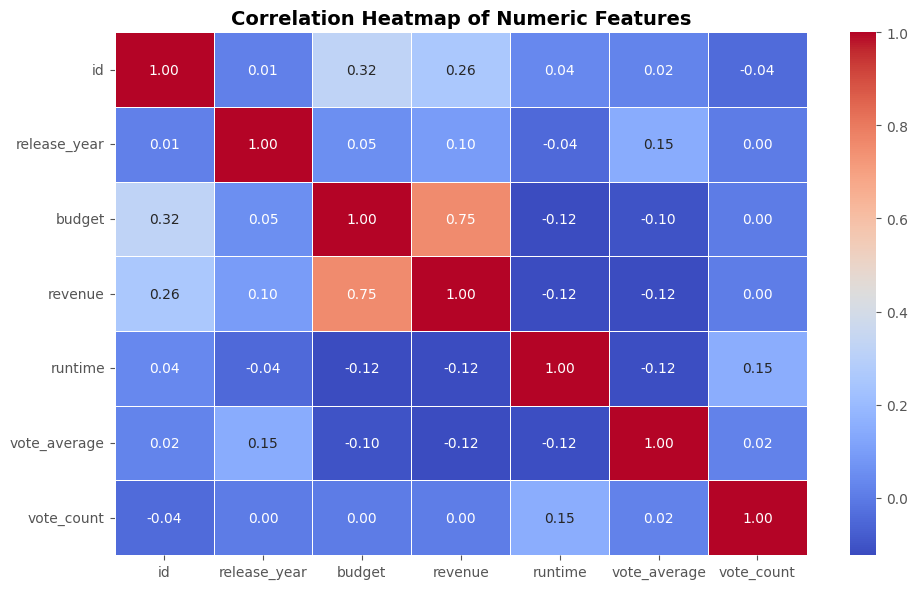

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix for numeric columns
corr = df.corr(numeric_only=True)

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()


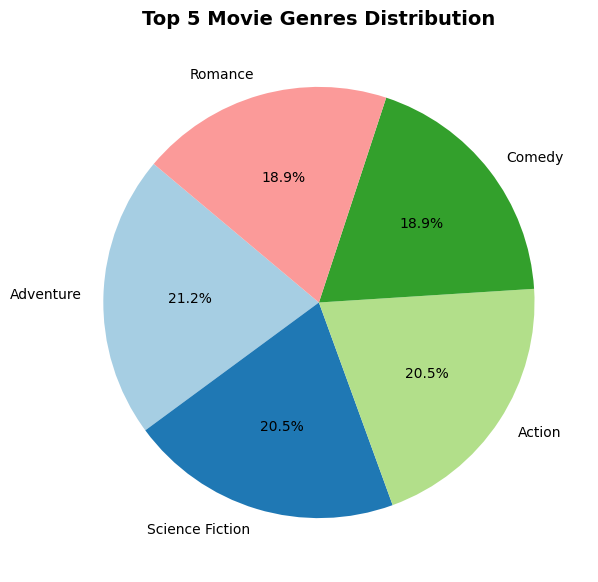

In [8]:
import matplotlib.pyplot as plt
from collections import Counter

# Extract genres
all_genres = []
for genres in df['genre'].dropna():
    all_genres.extend([g.strip() for g in genres.split(',')])

genre_counts = Counter(all_genres).most_common(5)  # top 5 genres
labels, sizes = zip(*genre_counts)

plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title("Top 5 Movie Genres Distribution", fontsize=14, fontweight="bold")
plt.show()


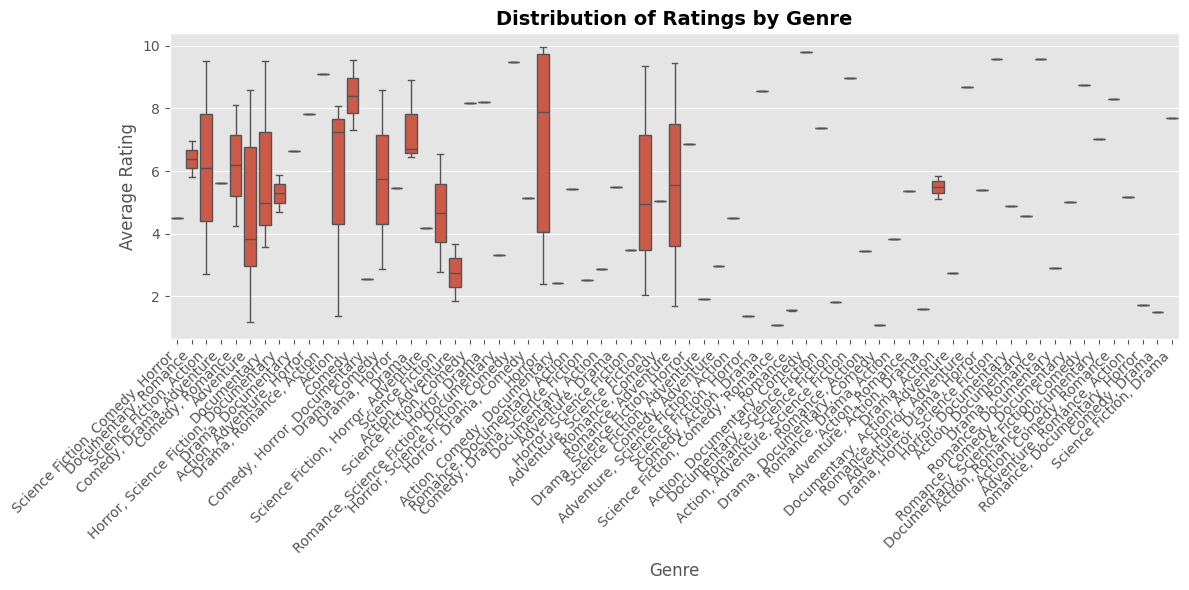

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(x="genre", y="vote_average", data=df.explode("genre").dropna(subset=["genre"]))
plt.xticks(rotation=45, ha="right")
plt.title("Distribution of Ratings by Genre", fontsize=14, fontweight="bold")
plt.xlabel("Genre")
plt.ylabel("Average Rating")
plt.tight_layout()
plt.show()


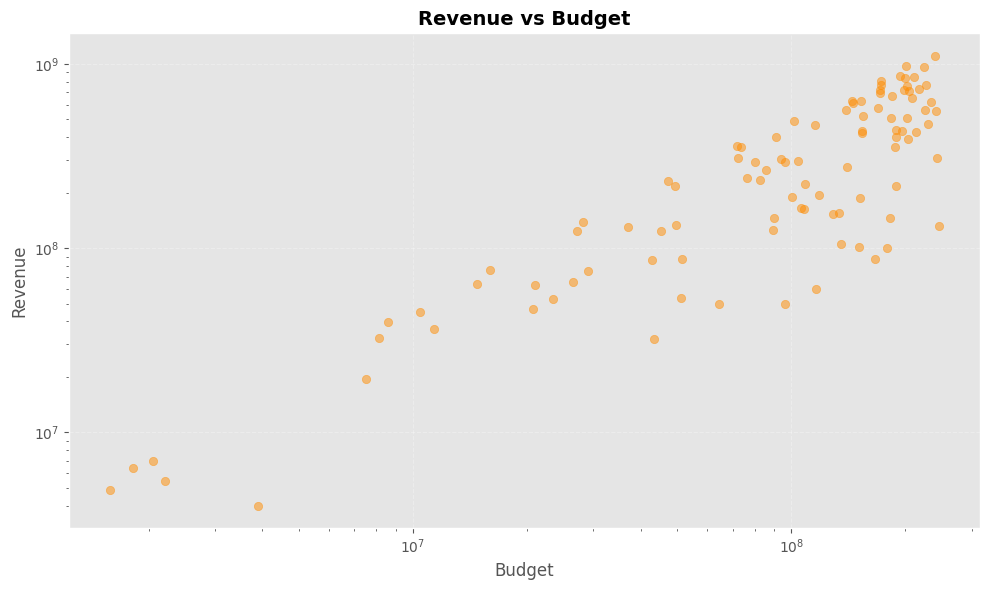

In [10]:
plt.figure(figsize=(10,6))
plt.scatter(df['budget'], df['revenue'], alpha=0.5, color='darkorange')
plt.title("Revenue vs Budget", fontsize=14, fontweight="bold")
plt.xlabel("Budget")
plt.ylabel("Revenue")
plt.xscale("log")
plt.yscale("log")
plt.grid(alpha=0.3, linestyle="--")
plt.tight_layout()
plt.show()


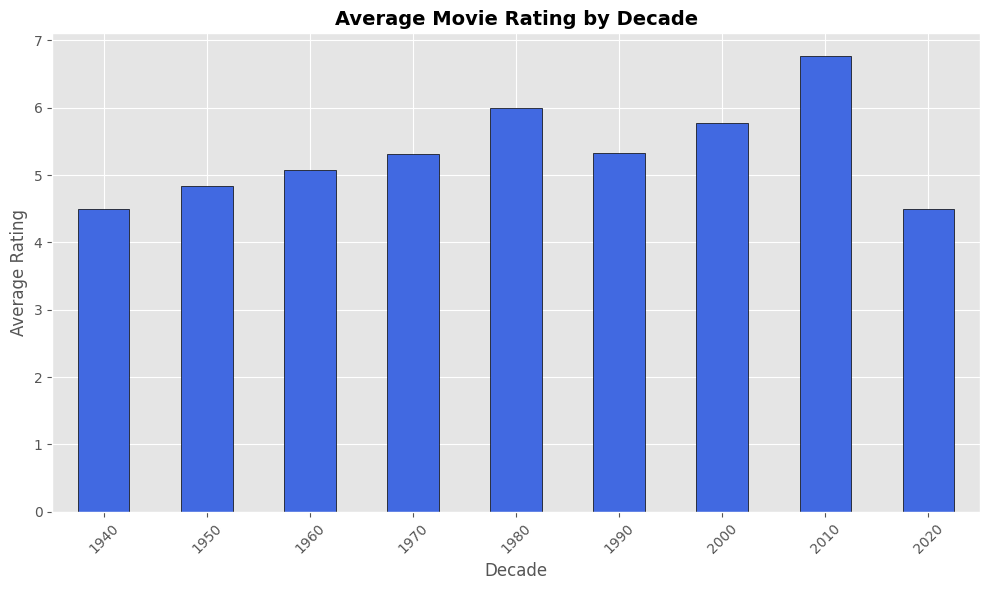

In [11]:
df['decade'] = (df['release_year']//10)*10
avg_rating_decade = df.groupby('decade')['vote_average'].mean()

plt.figure(figsize=(10,6))
avg_rating_decade.plot(kind='bar', color='royalblue', edgecolor='black')
plt.title("Average Movie Rating by Decade", fontsize=14, fontweight="bold")
plt.xlabel("Decade")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
